# Descriptive Notebook for Text-based Datasets
___
__Name of dataset__: daniel_0212  
__Date__: 02.12.2018  
__Creator__: Daniel  
__Purpose__: No specific pipeline   
__Crawled Databases__: ARXIV

__Used Queries (Code Snippet)____:

```
excluded = ["astro-ph", "cond-mat", "gr-gc", "hep-ex", "hep-lat", "hep-ph", "hep-th", "nlin", "nucl-ex",
            "nucl-th", "quant-ph", "math", "physics"]
          
search_query_11 = "abs:clustering+AND+abs:data+AND+ti:clustering+ANDNOT+%28{}%29".format(exclude)
search_query_12 = "abs:regression+AND+abs:data+AND+ti:regression+ANDNOT+%28{}%29".format(exclude)

search_query_11 = "abs:clustering+AND+abs:data+AND+ti:clustering+ANDNOT+%28{}%29".format(exclude)
search_query_12 = "abs:regression+AND+abs:data+AND+ti:regression+ANDNOT+%28{}%29".format(exclude)
search_query_14 = "abs:%22association+rule%22+AND+abs:data+AND+ti:%22association+rule%22+ANDNOT+%28{}%29"
                    .format(exclude)

search_query_21 = "abs:clustering+AND+ti:clustering+ANDNOT+%28{}%29".format(exclude)
search_query_22 = "abs:regression+AND+ti:regression+ANDNOT+%28{}%29".format(exclude)
search_query_23 = "abs:classification+AND+ti:classification+ANDNOT+%28{}%29".format(exclude)
search_query_24 = "abs:%22association+rule%22+AND+ti:%22association+rule%22+ANDNOT+%28{}%29".format(exclude)

search_query_31 = "abs:%22clustering+is%22+AND+ti:clustering+ANDNOT+%28{}%29".format(exclude)
search_query_32 = "abs:%22regression+is%22+AND+ti:regression+ANDNOT+%28{}%29".format(exclude)
search_query_33 = "abs:%22classification+is%22+AND+ti:classification+ANDNOT+%28{}%29".format(exclude)

search_query_4 = "abs:%22association+rule%22+AND+abs:data+AND+ti:%22association+rule%22+%28{}%29".format(exclude)

### Later added queries
search_query_51 = "all:sequential+pattern+AND+abs:data+ANDNOT+%28{}%29".format(exclude)
search_query_52 = "all:frequential+pattern+AND+abs:data+ANDNOT+%28{}%29".format(exclude)
search_query_53 = "abs:prediction+AND+ti:prediction+ANDNOT+%28{}%29".format(exclude)
```

__Additional Notes__:  
<p>...</p>
___


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from typing import *
import string
sns.reset_defaults()

## Loading the data 
__Dir structure__ for text-based dataset is stored as illustrated: 
- super_dir
    - dir(represents the class of the txt)
        - 1.txt
        - 2.txt
        - n.txt
    - dir (another class)
        - 1.txt
        - 2.txt
        - n.txt

In [2]:
super_dir = "data/datasets/daniel_0212"

In [3]:
%%time
_classes = []
_paths = []
_sentences_len = []
_tokens_len = []
_words_len = []
_unique_tokens_len = []
_unique_lemmatized = []
#_tokens = []
_class_tokens = {}
lemmatizer = WordNetLemmatizer()
for root, dirs, files in os.walk(super_dir):
    if len(dirs) == 0:
        # treat super dir as class
        pass
    else:
        for _class_name in dirs: 
            path = os.path.join(super_dir, _class_name)
            #x = [data.append({_class_name: os.path.join(path, x)}) for x in os.listdir(path) if x.endswith(".txt")]
            for file_path in [x for x in os.listdir(path) if x.endswith(".txt")]:
                
                # Read File
                file = open(os.path.join(path,file_path), "r")
                txt = file.read()
                file.close()
                # Tokenization
                tokens = word_tokenize(txt)
                unique_tokens = set(tokens)
                
                #Building dict[class: tokens]
                if _class_name in _class_tokens.keys():
                    _class_tokens[_class_name] += tokens
                else:
                    _class_tokens.update({_class_name: tokens})
                
                #Filling list for pd.DataFrame
                _unique_lemmatized.append(len({lemmatizer.lemmatize(x) for x in tokens}))
                #[_tokens.append(x) for x in words]
                _tokens_len.append(len(tokens))
                _unique_tokens_len.append(len(set(tokens)))
                _classes.append(_class_name)
                _paths.append(os.path.join(file_path))
                _sentences_len.append(len(sent_tokenize(txt)))
                
                
            


CPU times: user 23.3 s, sys: 1.16 s, total: 24.4 s
Wall time: 25.7 s


In [4]:
df = pd.DataFrame(list(zip(_classes, _paths, _sentences_len, _tokens_len, _unique_tokens_len, _unique_lemmatized)),
                  columns = ["class", "file_name", "#sentences", "#tokens", "#unique_tokens","#unique_lemmatized"])

In [5]:
df.head()

,class,file_name,#sentences,#tokens,#unique_tokens,#unique_lemmatized
0,classification,[2015]A-Feature-based-Classification-of-Model-...,5,121,80,78
1,classification,[2018]Nonparametric-semisupervised-classificat...,9,189,115,111
2,classification,[2018]Rice-Classification-Using-Spatio-Spectra...,9,192,115,112
3,classification,[2011]A-Facial-Expression-Classification-Syste...,8,136,87,86
4,classification,[2018]Energy-Efficient-Event-Localization-and-...,7,207,136,133


In [6]:
#df.describe()

## Descriptive Measures about all Documents

### Tokens and Sentences

In [7]:
%%time
tokens = sum(list(_class_tokens.values()), []) # Get all values of dict[class: [tokens]] in a list
print("Number of documents: {}".format(df.shape[0]))
print("Number of unique files: {}".format(df["file_name"].nunique()))
print("Number of tokens: {}".format(df["#tokens"].sum()))
print("Number of unique tokens: {}".format(len({x for x in tokens})))
print("Number of Sentences: {}\n".format(df["#sentences"].sum()))

Number of documents: 8241
Number of unique files: 7989
Number of tokens: 1448885
Number of unique tokens: 41338
Number of Sentences: 58252

CPU times: user 161 ms, sys: 16.2 ms, total: 177 ms
Wall time: 176 ms


### Noise in Corpus

In [8]:
%%time
noise_numb = [x for x in tokens if x.isdigit()]
noise_punct = [x for x in tokens if x in string.punctuation]
noise_stopw = [x for x in tokens if x in stopwords.words('english')]
noise = len(noise_numb) + len(noise_punct) + len(noise_stopw)
noise_measure = noise/len(tokens) * 100

print("Digits in tokens: {}".format(len(noise_numb)))
print("Punctuation in tokens: {}".format(len(noise_punct)))
print("Stop-Words in tokens: {}".format(len(noise_stopw)))
print("Noise in corpus: {}%\n".format(noise_measure))

Digits in tokens: 4298
Punctuation in tokens: 150616
Stop-Words in tokens: 450861
Noise in corpus: 41.809736452513484%

CPU times: user 3min 23s, sys: 40.8 s, total: 4min 4s
Wall time: 4min 6s


### Words in Corpus

In [9]:
%%time
unique_words = set(tokens)-set(noise_numb)-set(noise_punct)-set(noise_stopw)
len_unique_words = len(unique_words)
len_unique_lemmas = len({lemmatizer.lemmatize(x) for x in unique_words})

print("Unique words: {}".format(len_unique_words))
print("Unqiue words after lemmatization (unique): {}".format(len_unique_words))
print("Unique word lost caused by lemmatization: {}%\n".format((1-(len_unique_lemmas/len_unique_words))*100))

Unique words: 40751
Unqiue words after lemmatization (unique): 40751
Unique word lost caused by lemmatization: 5.808446418492796%

CPU times: user 286 ms, sys: 5.68 ms, total: 291 ms
Wall time: 291 ms


## Visualizations

TODO: 
1. There is still the _class_tokens object(dict[class_name: [tokens]]). Visualization about number of words, noise, etc. per class

### Class Distribution

class
association       2272
classification    2016
clustering        2271
regression        1682
Name: file_name, dtype: int64

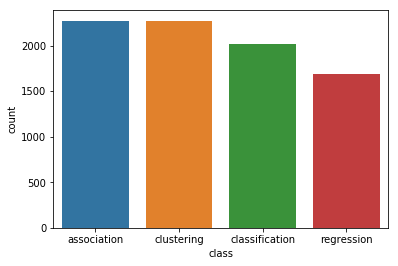

In [19]:
ax = sns.countplot(x="class", data=df, order = df['class'].value_counts().index)
df.groupby('class').count()["file_name"]

### Barplot Document-Level

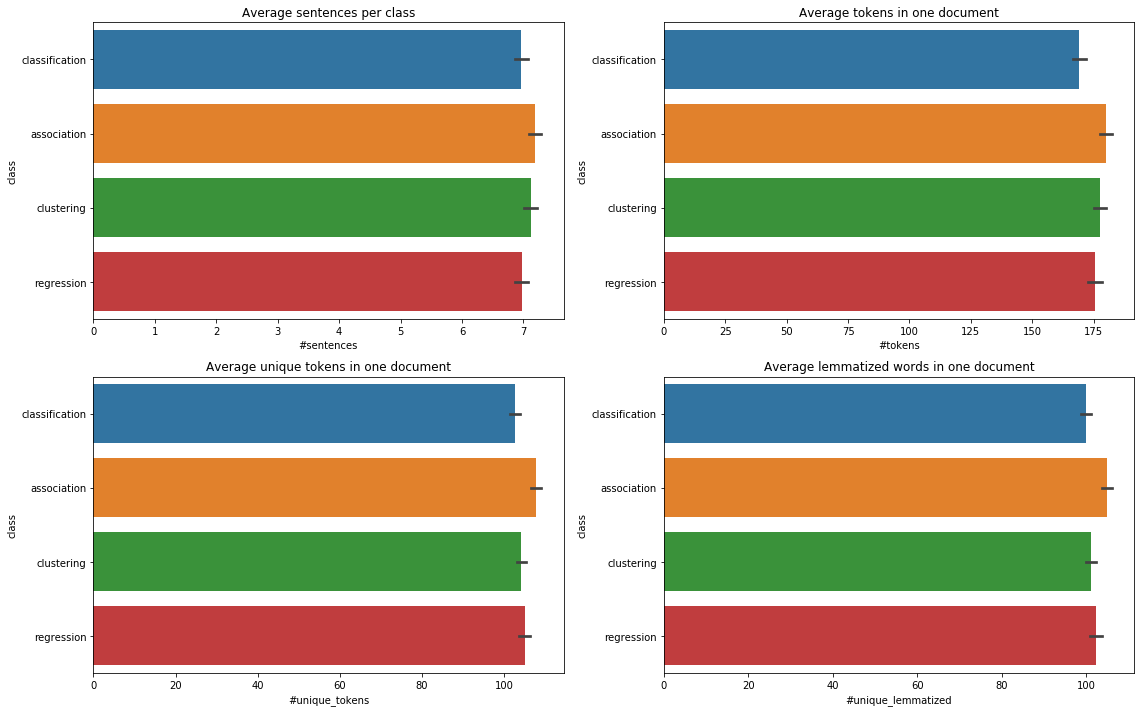

In [11]:
figure = plt.figure()
#figure.suptitle("Averaged Measures")
figure.set_size_inches(16,10)

ax_1 = figure.add_subplot(2,2,1)
ax_2 = figure.add_subplot(2,2,2)
ax_3 = figure.add_subplot(2,2,3)
ax_4 = figure.add_subplot(2,2,4)

ax_1.set_title("Average sentences per class")
ax_2.set_title("Average tokens in one document")
ax_3.set_title("Average unique tokens in one document")
ax_4.set_title("Average lemmatized words in one document")

plt_sent = sns.barplot(x="#sentences", y = "class", data=df, ax=ax_1)
plt_word = sns.barplot(x="#tokens", y = "class", data = df, ax=ax_2)
plt_uword = sns.barplot(x="#unique_tokens", y = "class", data = df, ax=ax_3)
plt_lemma = sns.barplot(x="#unique_lemmatized", y = "class", data = df, ax=ax_4)

plt.tight_layout()